In [1]:
!pip install yfinance pandas numpy scikit-learn matplotlib


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 2.4 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 2.5 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 2.6 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 2.4 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 2.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139096 sha256=48ee180ca27ef8666110635c33d08061d11766e331a535a150f

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

[*********************100%***********************]  1 of 1 completed


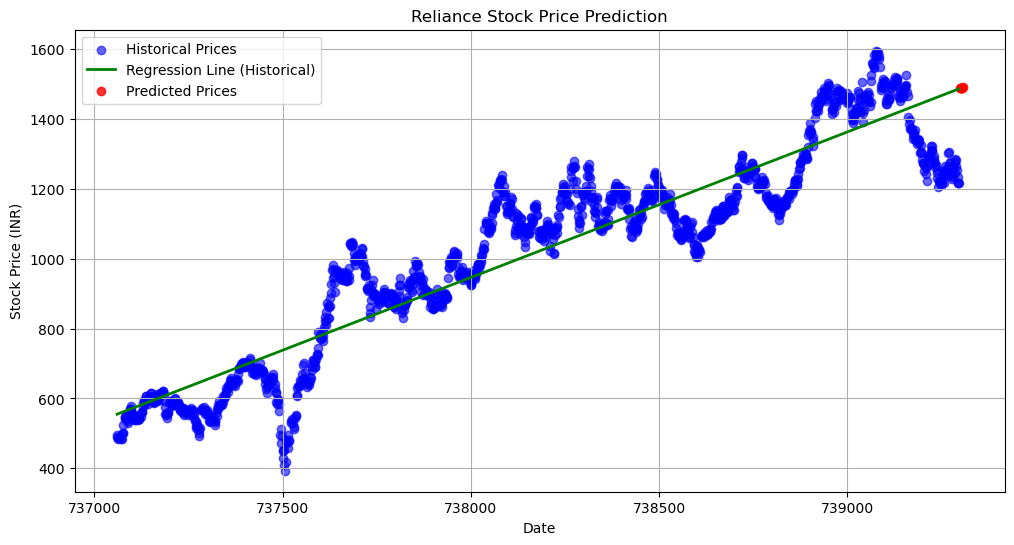


📌 Predicted Reliance Stock Prices for the Next Week:

                        Date  Predicted Price (INR)
0 2025-02-18 22:30:37.985777            1487.832575
1 2025-02-19 22:30:37.985777            1488.249114
2 2025-02-20 22:30:37.985777            1488.665652
3 2025-02-21 22:30:37.985777            1489.082191
4 2025-02-22 22:30:37.985777            1489.498730
5 2025-02-23 22:30:37.985777            1489.915268
6 2025-02-24 22:30:37.985777            1490.331807


In [15]:
# Fetch historical stock data for Reliance
stock_data = yf.download('RELIANCE.NS', start='2019-01-01', end=datetime.today().strftime('%Y-%m-%d'))

# Check if data is empty
if stock_data.empty:
    raise ValueError("No data fetched. Please check the stock symbol or API limits.")

# Convert Date index to numerical format
stock_data['Date'] = stock_data.index.map(pd.Timestamp.toordinal)

# Select features (X) and target variable (y)
X = stock_data[['Date']]
y = stock_data['Close']

# Check if there is enough data for training
if len(X) < 10:
    raise ValueError("Not enough data points for training. Try increasing the date range.")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate future dates (next 7 days)
future_dates = [datetime.today() + timedelta(days=i) for i in range(1, 8)]
future_dates_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

# Predict stock prices for the next week
future_predictions = model.predict(future_dates_ordinal)

# Convert predictions to DataFrame
predicted_prices = pd.DataFrame({'Date': future_dates, 'Predicted Price (INR)': future_predictions.flatten()})

# ✅ Plot actual vs predicted prices with Regression Line
plt.figure(figsize=(12, 6))

# Scatter plot of historical data
plt.scatter(X, y, color='blue', label='Historical Prices', alpha=0.6)

# Linear regression line for historical data
plt.plot(X, model.predict(X), color='green', linestyle='solid', linewidth=2, label='Regression Line (Historical)')

# Future prediction points
plt.scatter(future_dates_ordinal, future_predictions, color='red', marker='o', label='Predicted Prices', alpha=0.8)

# Line connecting future predictions
plt.plot(future_dates_ordinal, future_predictions, color='red', linestyle='dashed')

# Labels and Title
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.title('Reliance Stock Price Prediction')
plt.legend()
plt.grid()
plt.show()

# Display predicted stock prices
print("\n📌 Predicted Reliance Stock Prices for the Next Week:\n")
print(predicted_prices)

In [16]:
print(stock_data)

Price             Close         High          Low         Open      Volume  \
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS   
Date                                                                         
2019-01-01   495.353485   498.137402   490.536954   497.231533     9746670   
2019-01-02   488.902008   498.004853   486.515806   492.481266    15628818   
2019-01-03   482.870209   492.525394   481.699216   489.388009    16288287   
2019-01-04   485.477325   488.040276   477.722252   484.924985    18516544   
2019-01-07   488.172852   494.226685   486.515770   489.167095    12060290   
...                 ...          ...          ...          ...         ...   
2025-02-10  1253.650024  1266.500000  1245.550049  1264.500000     6970972   
2025-02-11  1234.849976  1264.550049  1230.099976  1264.550049     8859714   
2025-02-12  1216.550049  1226.900024  1193.349976  1219.449951    21131654   
2025-02-13  1216.099976  1228.000000  1212.000000  1217.050049  